In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

In [3]:
df = pd.read_csv("iris_dataset.csv",sep=";")

+ $X_{i,d}$ is the location of the $i$-th object, along dimension (feature) $d$
+ $y_i $ is the class membership of the $i$-th object


In [4]:
y = df["species"]
X = df.copy()
del X["species"]

In [5]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Holdout training

In [7]:
from sklearn.model_selection import train_test_split

+ split the dataset into a train and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

+ create a Decision Tree instance

In [9]:
dt = DecisionTreeClassifier()

+ __Fit__ the Decision Tree using the __training set__

In [10]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

+ Use the DecisionTree to __predict__ the class membership of the __test set instances__

In [11]:
y_predict = dt.predict(X_test)

+ Compute the __confusion matrix__ 

In [12]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
species,,,
Iris-setosa,16,0,0
Iris-versicolor,0,18,1
Iris-virginica,0,1,14


+ Compute the model's __accuracy__

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.96

+ Compute the __precision__ of the model

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")

(0.96, 0.9602339181286549)

+ Compute the recall of the model

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predict,average="weighted"), recall_score(y_test,y_predict,average="macro")

(0.96, 0.9602339181286549)

+ Compute the model's __F1__ score

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")

(0.96, 0.9602339181286549)

+ Classification __report__ 

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

    avg / total       0.96      0.96      0.96        50



# Plot the decision tree

In [28]:
from sklearn.tree import plot_tree
_=plot_tree(dt,filled=True,class_names=dt.classes_)

ImportError: cannot import name 'plot_tree'

In [29]:
from sklearn.tree import export_graphviz
import graphviz

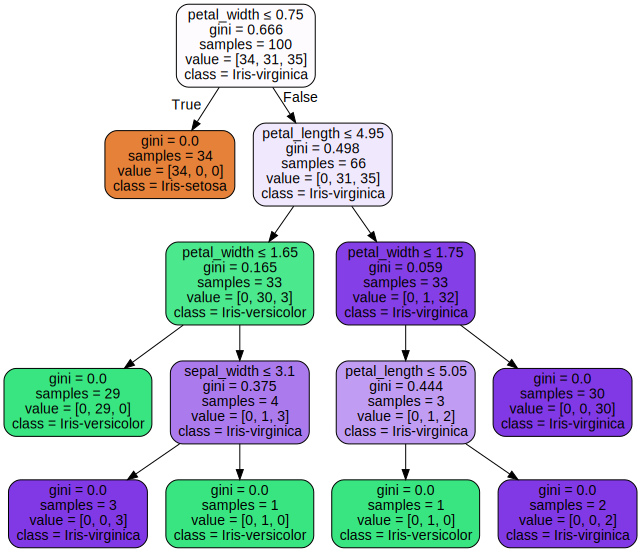

In [30]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,
                           class_names=dt.classes_, 
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#graph.render("out_iris_decision_tree") # to generate a pdf

# Cross-validation

In [31]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

+ Create a __stratified cross-validation__ splitter 

In [32]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

+ You can also create a __normal cross-validation__ splitter

In [33]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=5, shuffle=True)

+ For __small__ datasets, you could also use a __repeated holdout random subsampling__



In [34]:
# from sklearn.model_selection import ShuffleSplit
# cv = ShuffleSplit(n_splits=100, test_size=0.1) 

+ Define a __list of evaluation metrics__ to assess

In [35]:
scoring = ['accuracy',
           'precision_macro',
           'precision_weighted',
           'recall_macro',
           'recall_weighted',
           'f1_macro',
           'f1_weighted']

In [36]:
scores = cross_validate(dt, X, y, scoring=scoring,
                        cv=cv, return_train_score=True)
                                       

In [37]:
pd.DataFrame(scores).mean()

fit_time                    0.001172
score_time                  0.003691
test_accuracy               0.953333
test_f1_macro               0.952806
test_f1_weighted            0.952806
test_precision_macro        0.960373
test_precision_weighted     0.960373
test_recall_macro           0.953333
test_recall_weighted        0.953333
train_accuracy              1.000000
train_f1_macro              1.000000
train_f1_weighted           1.000000
train_precision_macro       1.000000
train_precision_weighted    1.000000
train_recall_macro          1.000000
train_recall_weighted       1.000000
dtype: float64

# Underfitting - Overfitting ?

In [38]:
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
results = {}
for leaves in range(2,40):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="gini")
    local_results = cross_validate(dt, X, y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pd.DataFrame(results)

In [39]:
import matplotlib.pyplot as plt

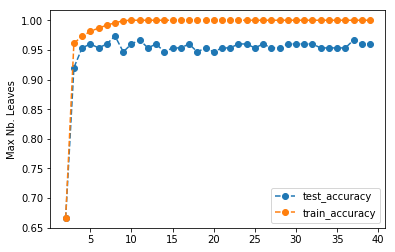

In [40]:
plt.plot(results_df.T.index , results_df.T["test_accuracy"],"o--")
plt.plot(results_df.T.index , results_df.T["train_accuracy"],"o--")
plt.legend()
plt.ylabel("Accuracy")
plt.ylabel("Max Nb. Leaves")

# Using DTs to explain clusters shapes
Let us imagine that you clustered your data points using a clustering algorithm such as k-means, and that you want to better understand your clustering model.
An idea could be to train a DT to predict the data points cluster memberships, from their attributes values, and then simply check the tree structure.

In this case, it is not necessary to split the dataset into a train and a test subsets, since our goal is not to __induce a classifier__, but to __describe the clustering model using a DT__

+ Cluster the data points

In [31]:
from sklearn.cluster import KMeans
km = KMeans(3)
cluster_memberships = km.fit_predict(X)

In [32]:
# cast the cluter memberships as strings (for the visualization of the three only)
cluster_memberships = cluster_memberships.astype(str)
cluster_memberships

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2',
       '0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '0',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '0', '2', '0', '0',
       '0', '0', '2', '0', '0', '0', '0', '0', '0', '2', '2', '0', '0',
       '0', '0', '2', '0', '2', '0', '2', '0', '0', '2', '2', '0', '0',
       '0', '0', '0', '2', '0', '0', '0', '0', '2', '0', '0', '0', '2',
       '0', '0', '0', '2', '0', '0', '2'], dtype='<U11')

+ Train a DT to predict the cluster memberships

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,cluster_memberships)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

+ Plot the tree structure

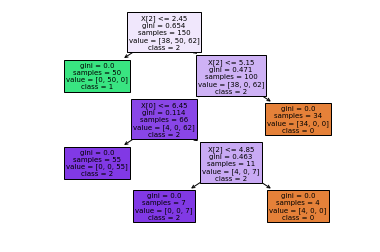

In [34]:
from sklearn.tree import plot_tree
_=plot_tree(dt,filled=True,class_names=dt.classes_)